In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [ ]:
!cd ../feature\ engineering

In [851]:
df = pd.read_csv('final.csv')

In [852]:
mask = (df.dtypes == np.float64) | (df.dtypes == np.int)
df_sub = df.ix[:, mask]
df_sub = df_sub.dropna(axis = 1, thresh = 10)
ids = df_sub.id
df_sub = df_sub.drop(['latitude', 'longitude', 'id'], axis = 1)

a = df_sub.apply(lambda s : s.value_counts().get(0,0), axis=0)
a = a[a > 20].index

In [853]:
df_sub.drop(a, axis = 1, inplace = True)

In [848]:
dff = df_sub[['People Data: Average Commute Time (Minutes)',
'People Data: Average Household Size', 'People Data: Homes With Kids','People Data: Median Age', 'People Data: Median Household Income','People Data: Single Females', 'People Data: Single Males', 'zindex','drugs_alc', 'theft', 'violent', '2011.0', '2012.0', '2013.0','2014.0', '2015.0', 'chg_2011_2012', 'chg_2012_2013','chg_2013_2014', 'transit_score', 'walkscore', 'business','business_perc', 'character', 'character_perc', 'essentials','essentials_perc', 'nightlife', 'nightlife_perc', 'restaurants','restaurants_perc', 'workout', 'workout_perc', 'yelp_total']]

X = imp.fit_transform(dff)
X_centered = preprocessing.scale(X)

In [868]:
pca = PCA(copy=True, n_components=10, whiten=False)
imp = preprocessing.Imputer(axis=0)

X = imp.fit_transform(df_sub)
X_centered = preprocessing.scale(X)
X_pca = pca.fit_transform(X_centered)
print(pca.explained_variance_ratio_)





[ 0.26186082  0.1318616   0.08340358  0.07380746  0.05028215  0.04389145
  0.03693412  0.03525937  0.03052859  0.02328369]


In [645]:
clt = KMeans(n_clusters = 10)
clusters = clt.fit_predict(X_centered)

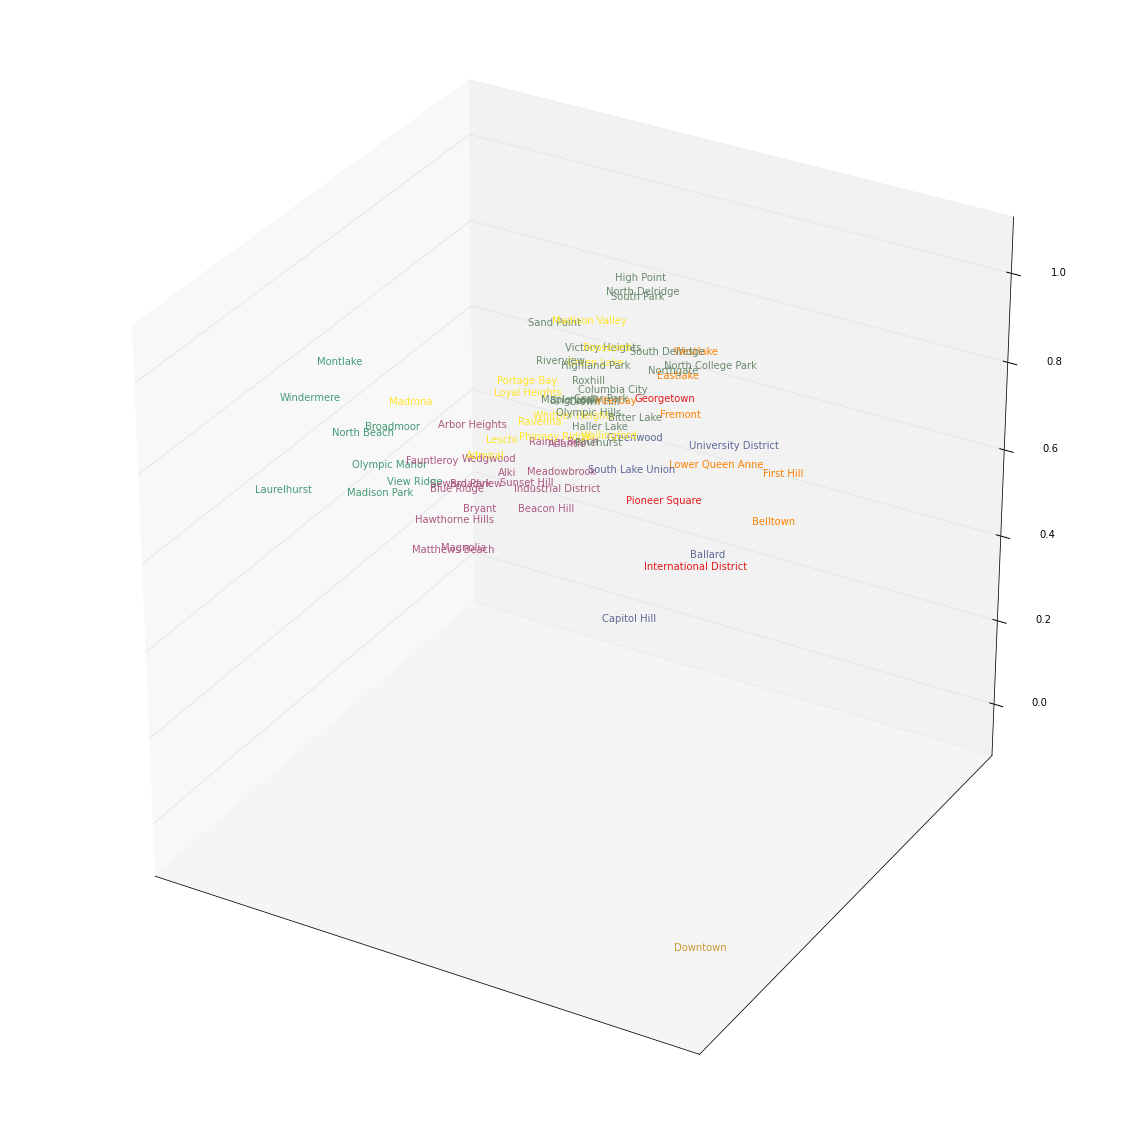

In [263]:
plot_embedding(X_pca, clusters, df.name)

In [182]:
df_vec = pd.DataFrame(pca.components_.T, index = df_sub.columns)

In [183]:
df_vec['size'] = np.sqrt(df_vec[0]**2 + df_vec[1]**2 + df_vec[2]**2)

In [203]:
#df_vec.sort('size', ascending = False)

In [142]:
def plot_embedding(X, y, name_list, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(20, 20), dpi=250)
    ax = plt.subplot(111, projection='3d')
    #ax.axis('off')
    #ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],X[i,2], str(name_list[i]), zdir=None, color=plt.cm.Set1(y[i] / 10.), fontsize = 10)

    plt.xticks([]), plt.yticks([])
    ax.set_xlim3d(-0.1, 1.1)
    ax.set_ylim3d(-0.1, 1.1)
    ax.set_zlim3d(-0.1, 1.1)
    if title is not None:
        plt.title(title, fontsize=16)

In [197]:
data = pd.DataFrame({'REGIONID': ids,'cluster': clusters})


In [837]:
for i in [2,3,4,5,6,7,8,9,10,11,12]:
    clusterer = KMeans(n_clusters=i)
    cluster_labels = clusterer.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.242153675808
For n_clusters = 3 The average silhouette_score is : 0.181455395933
For n_clusters = 4 The average silhouette_score is : 0.16249516688
For n_clusters = 5 The average silhouette_score is : 0.145655654052
For n_clusters = 6 The average silhouette_score is : 0.177052326093
For n_clusters = 7 The average silhouette_score is : 0.158826398094
For n_clusters = 8 The average silhouette_score is : 0.16922395844
For n_clusters = 9 The average silhouette_score is : 0.175136603129
For n_clusters = 10 The average silhouette_score is : 0.15828036671
For n_clusters = 11 The average silhouette_score is : 0.15834058446
For n_clusters = 12 The average silhouette_score is : 0.15857612006


Automatically created module for IPython interactive environment


NameError: name 'Kmeans' is not defined

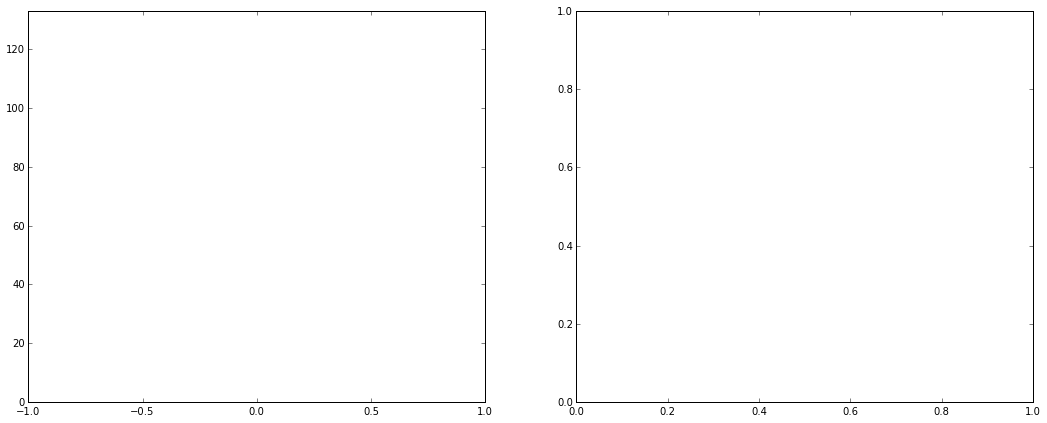

In [869]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close
# together.
X = X_pca

range_n_clusters = [5,8,10,11,12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer =  Kmeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors)

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1],
#                 marker='o', c="white", alpha=1, s=200)

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

    plt.show()

In [682]:
from sklearn.cluster import SpectralClustering 

In [860]:
dbs =  SpectralClustering(n_clusters=n_clusters, n_init= 10, gamma = 3, eigen_tol=2.9)
cluster_labels = dbs.fit_predict(X_centered)
cluster_labels

array([ 0,  0,  0,  0,  0, 10,  3,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,
        8,  0, 11,  0,  5,  0,  0,  6,  6,  4,  0,  0,  0,  0,  0,  0,  0,
        3,  0,  0,  0, 10,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  9,  9,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  7,
        2,  1,  0,  0,  0], dtype=int32)

In [ ]:
f = dbs.fit_predict(X_)
f
#silhouette_score(X_centered, f)

In [426]:
from collections import Counter